In [2]:
import numpy as np
import psana as ps
import matplotlib.pyplot as plt
import sys
import time
import pickle
import os
from Functions import *
from raw_data_class import RawData as RDC
from processed_data_class import processed_data_class as PDC
%matplotlib notebook

In [16]:
save_dir = '/reg/d/psdm/cxi/cxilv2718/results/data/'
calib_dir = '/reg/d/psdm/cxi/cxilv2718/results/calibrations/'
runs = np.arange(41,44) # goes from first value in range to last - 1
plot_one = 41
epix_roi= [90,140,190,300]
xrt_roi = [400,1100]
calibration_file = 'calibration_2'

# Processing or Loading
process_raw = False
on_off = False # Do you want to plot the raw data?

plot_one_idx = np.searchsorted(runs,plot_one)
x_axis = 'energy' # 'pixels' or 'energy'
to_cal_file = [calib_dir, calibration_file]

In [13]:
# Energy Calibration, plot raw calibration runs with pixel axis and populate these arrays
save_cal = False
if save_cal is True:
    calib_runs = list(range(33,41))
    notch_energies = [7.04,7.045,7.05,7.055,7.065,7.07,7.075,7.08] # keV
    xrt_pixels =  [1030,946,859,780,607,521,438,0] # enter 0 if you can't see the notch
    epix_pixels = [0,0,215,228,254,266,279,0] # enter 0 if you can't see the notch

    labels = ['notch_energies','xrt_pixels','epix_pixels','rois','to_cal_file','calib_runs']
    rois = [xrt_roi,epix_roi]
    calib_in = [labels, notch_energies,xrt_pixels,epix_pixels,rois,to_cal_file,calib_runs]
    calib_out = energy_calib.energy_calib(calib_in,save_cal)
    print('')
    print('The loaded calibration settings are: ')
    current_cal = [print(calib_out[0][i] +' : '+ str(calib_out[i+1])) for i in list(range(0,5))+list(range(8,10))]
if os.path.exists(to_cal_file[0]+to_cal_file[1]+'.pkl') and save_cal is False:
    with open(to_cal_file[0] + to_cal_file[1] +'.pkl', "rb") as f:
        calib_out = pickle.load(f)
    print('The loaded calibration settings are: ')
    current_cal = [print(calib_out[0][i] +' : '+ str(calib_out[i+1])) for i in list(range(0,5))+list(range(8,10))]   
    
if not os.path.exists(to_cal_file[0]+to_cal_file[1]+'.pkl'):
    print(to_cal_file[1] + ' does not exist.')
    print('No calibration file loaded.')

The loaded calibration settings are: 
notch_energies : [7.04, 7.045, 7.05, 7.055, 7.065, 7.07, 7.075, 7.08]
xrt_pixels : [1030, 946, 859, 780, 607, 521, 438, 0]
epix_pixels : [0, 0, 215, 228, 254, 266, 279, 0]
rois : [[400, 1100], [90, 140, 190, 300]]
to_cal_file : ['/reg/d/psdm/cxi/cxilv2718/results/calibrations/', 'calibration_2']
epix_motor : 23.237
time_calibrated : 2021-05-29 02:03:10.117061


exp=cxilv2718:run=41:smd
exp=cxilv2718:run=42:smd
exp=cxilv2718:run=43:smd
Raw Data plotting is turned off.
Raw Data plotting is turned off.


<IPython.core.display.Javascript object>


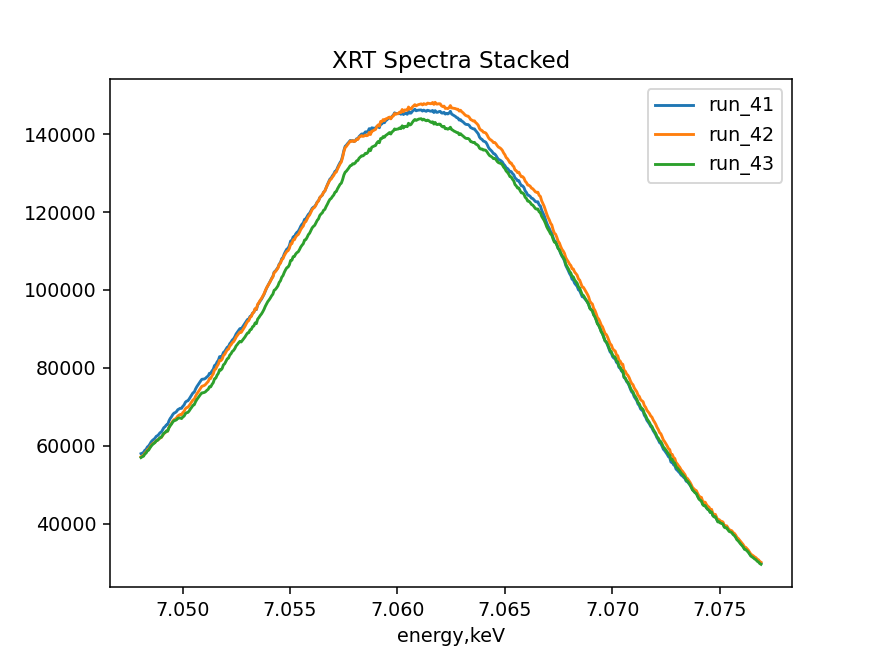

In [17]:
# Raw Data
plot_one = 42
raw_datas = []
for run in runs:
    scan_name = 'run_' + str(run)
    ds_string = 'exp=cxilv2718:run='+str(run)+':smd'
    print(ds_string)
    if process_raw:
        raw_data = load_data.load_data(save_dir,scan_name,ds_string,epix_roi,xrt_roi)
    else:
        if os.path.exists(save_dir + scan_name + "/" + "rawdata.pkl"):
            with open(save_dir + scan_name + "/" + "rawdata.pkl", "rb") as f:
                raw_data = pickle.load(f)
        else:
            print('You are trying to load a file that does not exist.')
    if os.path.exists(save_dir + scan_name + "/" + "rawdata.pkl"):
        raw_datas = raw_datas + [raw_data]

[load_data.add_cal_info(raw_datas[i],to_cal_file) for i in range(0,len(raw_datas))]
plot_raw.plot_raw(raw_datas, plot_one, x_axis, on_off,to_cal_file)

plot_raw.plot_raw(raw_datas, plot_one, x_axis, on_off,to_cal_file)
# plt.figure()
# #[plt.plot(raw_datas[i].epix_energy_windowed,np.mean(raw_datas[i].epix_windowed,0),label=raw_datas[i].scan_name) for i in range(0,len(runs))]
# [plt.plot(raw_datas[i].xrt_energy_windowed,np.mean(raw_datas[i].xrt_windowed,0),label=raw_datas[i].scan_name) for i in range(0,len(runs))]

# plt.legend()
# plt.xlabel('energy,keV')
# plt.title('XRT Spectra Stacked')
# plt.show()

In [9]:
# Applys an energy window to both spectra. Decide on window based on epix spectrum above.
# Also, reduces the resolution of the xrt spectrometer to match that of the epix.
energy_window = [7.04775,7.07725]
for i in range(0,len(raw_datas)):
    reduce_xrt_res.apply_window(raw_datas[i],energy_window)
    reduce_xrt_res.reduce_res(raw_datas[i])


# plt.figure()
# plt.plot(raw_data.epix_energy_windowed,np.sum(raw_data.xrt_red_res,0))
# plt.plot(raw_data.xrt_energy_windowed,np.sum(raw_data.xrt_windowed,0),alpha=0.5)
# plt.show()

Filter info for run_41:
Bounds filters removed 2526 shots out of 29937 total shots.
Linearity filters removed 3858 shots out of 29937 total shots.
The combined filters removed 6384 shots out of 29937 total shots.

Filter info for run_42:
Filter0 removed 654 unique shots out of 36401 total shots.
Filter1 removed 1449 unique shots out of 36401 total shots.
Filter2 removed 1429 unique shots out of 36401 total shots.
Filter3 removed 1131 unique shots out of 36401 total shots.


/reg/data/ana16/cxi/cxilv2718/results/LCLS_LV_27_Data_Analysis/Functions/Filters.py:90: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m, _, _, _ = np.linalg.lstsq(var_x[bounds_conds][:,np.newaxis],var_y[bounds_conds])


<IPython.core.display.Javascript object>


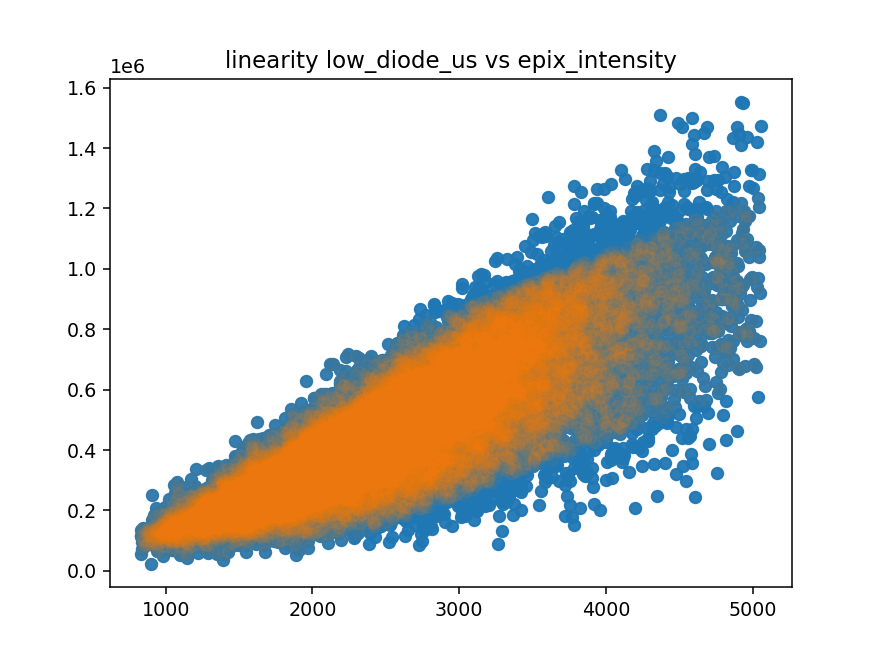

Filter4 removed 656 unique shots out of 36401 total shots.


<IPython.core.display.Javascript object>


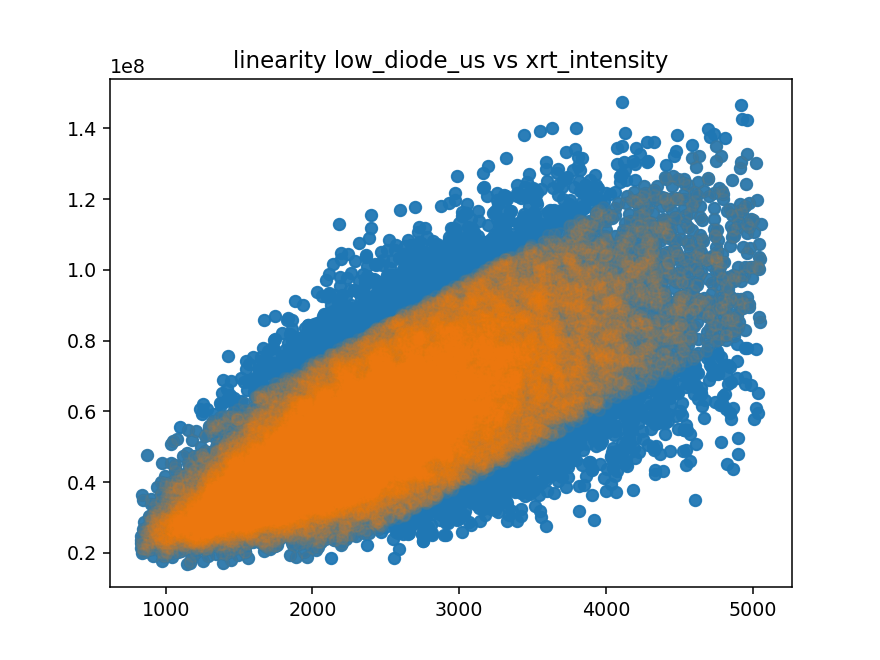

Filter5 removed 1750 unique shots out of 36401 total shots.
The combined filters removed 7069 shots out of 36401 total shots.
Bounds filters removed 4663 shots out of 36401 total shots.
Linearity filters removed 2406 shots out of 36401 total shots.
The combined filters removed 7069 shots out of 36401 total shots.

Filter info for run_43:
Bounds filters removed 3776 shots out of 29767 total shots.
Linearity filters removed 1359 shots out of 29767 total shots.
The combined filters removed 5135 shots out of 29767 total shots.



In [18]:
# Inputs for filters
# filters = [filter0,filter1, ...,filterN]

            # filterX[0] = On/Off # True or False
            # filterX[1] = Type # 'bounds','linearity','rms'
            # filterX[2] = [par0,par1,...,parN]
            
                # If Type = 'bounds'    # par0 = 'key_0' # key_X is string from raw_data.getKeys()
                                        # par1 = lower bound # check raw_data.keyX for starting point 
                                        # par2 = upper bound # 'None' if no upper bound
                                        # par3 = number of stds from median allowed
            
                # If Type = 'linearity' # par0 = 'key_0','key_1' # key_0 and key_1 and x and y values, respectively
                                        # par1 = width of filter
                                        # par2 = force fit through origin? # True or False
                    
# filterX[3] = [in_1, in_2]
                # in_1 = On/Off # True or false
                # in_2 = plot_one # The run you want to see plots for. Declared above in the 2nd block.

# print(raw_data.getKeys()) 
suspress_output = False
filt0 = [True,'bounds',['low_diode_us',0.1,'None',3],[False,plot_one]]
filt1 = [True,'bounds',['high_diode_us',0.1,'None',2],[False,plot_one]]
filt2 = [True,'bounds',['photon_energies',0.945,'None',2],[False,plot_one]]
filt3 = [True,'bounds',['pulse_energies_fee',0.3,'None',2],[False,plot_one]]

# The linearity filters create their fit based on data points that make it through
# the bounds filters.

# filt4 = [True,'linearity',['xrt_intensity','epix_intensity',0.08,True],[True,plot_one]]
filt5 = [True,'linearity',['low_diode_us','epix_intensity',0.15,True],[True,plot_one]]
filt6 = [True,'linearity',['low_diode_us','xrt_intensity',0.15,True],[True,plot_one]]

filters = [filt0,filt1,filt2,filt3,filt5,filt6]
# filters = [filt0,filt1,filt2,filt3,filt4,filt5,filt6]

conditions = [Filters.filtering(raw_datas[i],filters,suspress_output) for i in range(0,len(raw_datas))]

In [14]:
# Make or load processed data
make_pro = True
pro_datas = []
probe_run = [41,make_pro]

for i in range(0,len(raw_datas)):
    if make_pro:
        if i is 0:
            new_scale = raw_datas[np.searchsorted(runs,probe_run[0])].make_pro_data(conditions[np.searchsorted(runs,probe_run[0])],filters)
            probe_run = new_scale.scale_spectrometers(probe_run)
        processed_data = raw_datas[i].make_pro_data(conditions[i],filters)
        pro_datas = pro_datas + [processed_data]
    else:
        if os.path.exists(raw_datas[i].save_dir + raw_datas[i].scan_name + "/" + "pro_data.pkl"):
            with open(raw_datas[i].save_dir + raw_datas[i].scan_name + "/" + "pro_data.pkl", "rb") as f:
                processed_data = pickle.load(f)
                pro_datas = pro_datas + [processed_data]
                print('Loaded processed_data for run ' + processed_data.scan_name)
        else:
            print('You are trying to load a file that does not exist.')
        
    pro_datas[i].scale_spectrometers(probe_run)
rms_parameters = [[1,0.8],plot_one,False] # [[min_rmse_epix, min_rmse_xrt],plot_all,plot_one]
                                        # plot_one: Run # you want to plot, or 'None'
                                        # plot_all: True or False to plot histograms for each run in pro_datas
suspress_output = True

rms_conditions = [Filters.rms_filter(pro_datas[i],rms_parameters,suspress_output) for i in range(0,len(pro_datas))]

pro_datas = [Filters.apply_rms_filter(pro_datas[i],rms_conditions[i][2]) for i in range(0,len(pro_datas))]
# probe_run = [26,True]
# probe_run = pro_datas[-1].scale_spectrometers(probe_run)

UnboundLocalError: local variable 'combined_conditions' referenced before assignment

<IPython.core.display.Javascript object>


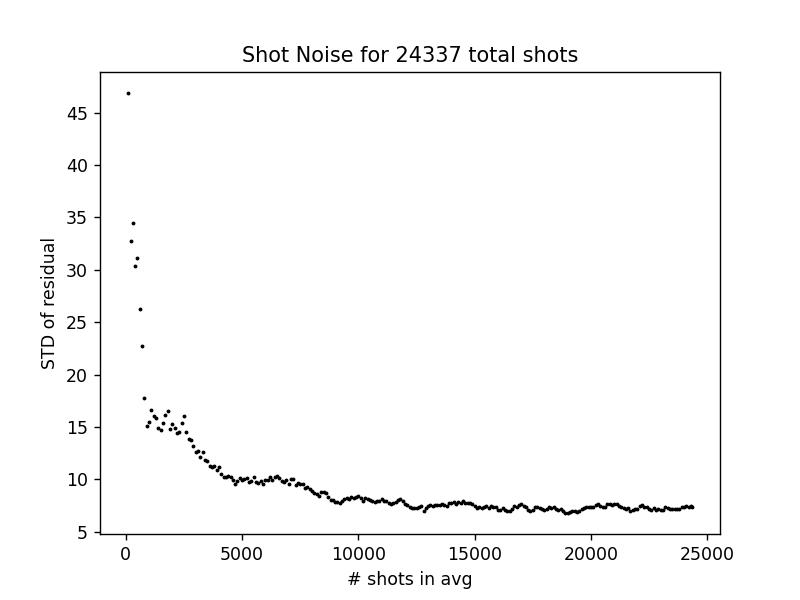

<IPython.core.display.Javascript object>


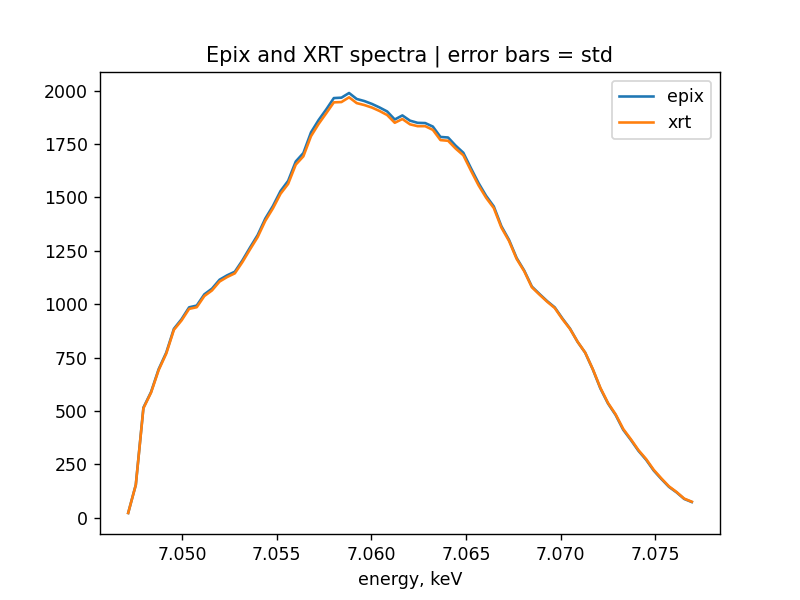

<IPython.core.display.Javascript object>


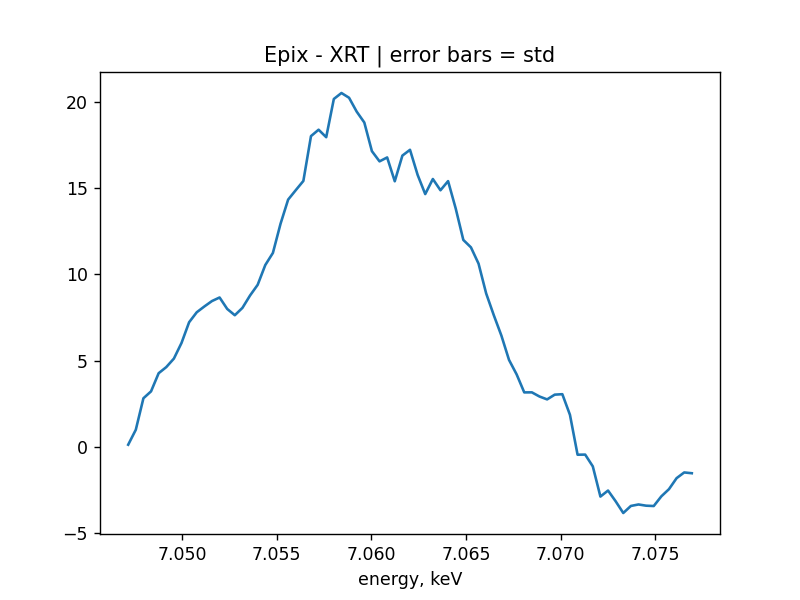

<IPython.core.display.Javascript object>


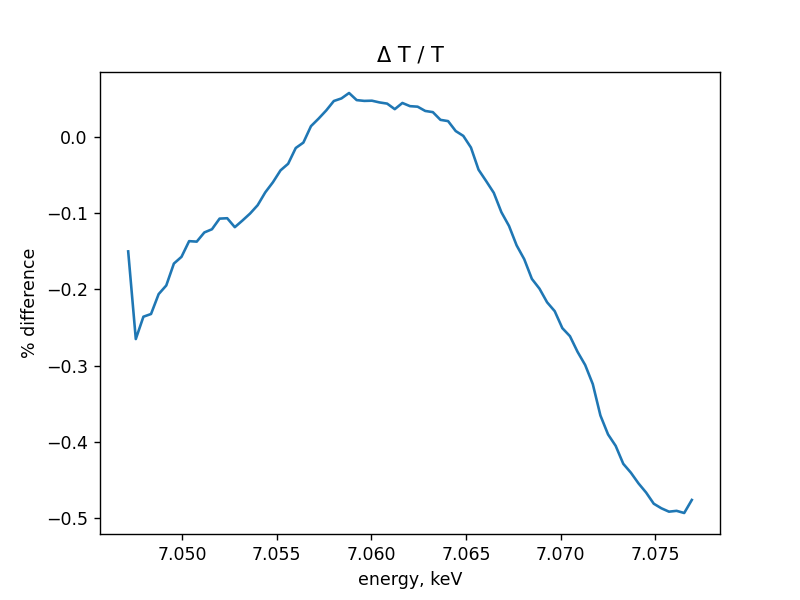

In [8]:
# Plotting the processed data
# plot_pro      .check_SN(processed_data, On/Off): Starts off with randomizing order of shots.
                    # Each data point corresponds to the standard deviation
                    # of the mean of x residuals; epix_spectrum-xrt_spectrum.
                    # Should give us an idea of how signal/noise improves with averaging.
                    # Smoothness of curve could also report on effectiveness of filters.
resid = plot_pro.check_SN(pro_datas[plot_one_idx],True)
plot_pro.plot_one_run(pro_datas[plot_one_idx],True)
# plot_pro.plot_average(pro_datas,True)




In [6]:
# total_I_epix = processed_data.epix_intensity
# total_I_xrt = processed_data.xrt_intensity
# energy = processed_data.epix_energy_windowed
# events = processed_data.eventIDs
# epix = processed_data.epix_windowed
# xrt = processed_data.xrt_based
# epix_avg = np.mean(epix,0)
# xrt_avg = np.mean(xrt,0)

# epix_norm = epix/np.max(epix_avg)
# xrt_norm = xrt/np.max(xrt_avg)
# epix_avg_norm = epix_avg/np.max(epix_avg)
# xrt_avg_norm = xrt_avg/np.max(xrt_avg)
#raw_data=RDC()

# epix_rms = np.sqrt(np.mean(np.subtract(epix_avg_norm,epix_norm)**2,1))
# xrt_rms = np.sqrt(np.mean(np.subtract(xrt_avg_norm,xrt_norm)**2,1))


# # plt.figure()
# # runs
# for i in range(0,len(runs)):
#     print(raw_datas[i].high_diode_us)
# [raw_datas[i].changeValue(epix_motor=np.round(raw_datas[i].epix_motor,3)) for i in range(0,len(raw_datas))]
##### for i in range(0,len(raw_datas)):
    
#####     with open(save_dir + raw_datas[i].scan_name + "/" + "rawdata.pkl", "wb") as f:
#####         pickle.dump(raw_datas[i], f)